# Load packages and define useful functions

In [1]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Look at the default setup
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Showing results for fishing, cargo and tanker vessels

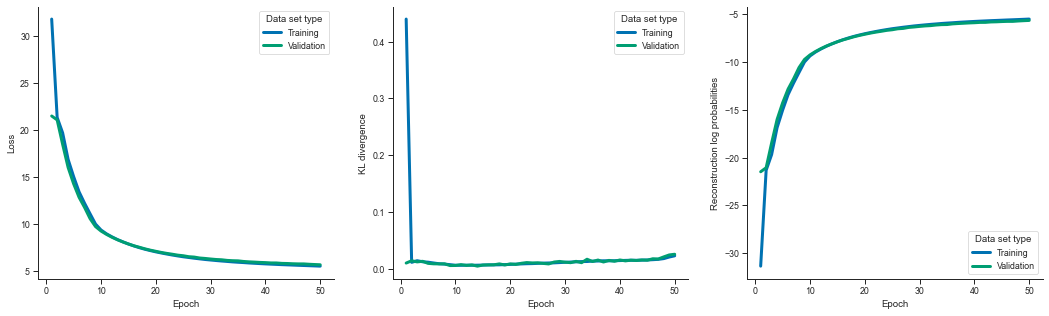

In [2]:
# Use the SummaryModels class
file_name = "RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600"
summary_models = SummaryModels(file_name)
df_default = summary_models.load_curves_df("Default")
summary_models.plot_curves(df_default)

#  Annealed Kullback–Leibler 

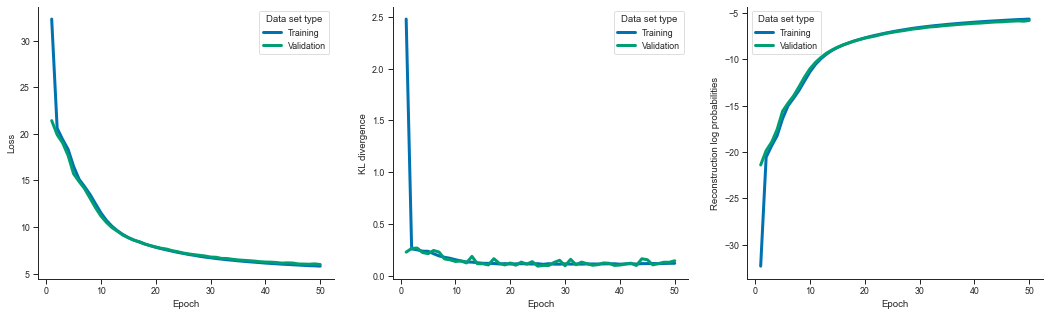

In [3]:
summary_models = SummaryModels(file_name, kl_annealing=True)
df_annealing = summary_models.load_curves_df("Annealing")
summary_models.plot_curves(df_annealing)

# Use batch normalization
Use the VRNN model, 100 dimensional latent and recurrent laten space, batch normalization, but no scheduler or KL annealing. Showing results for fishing, cargo and tanker vessels

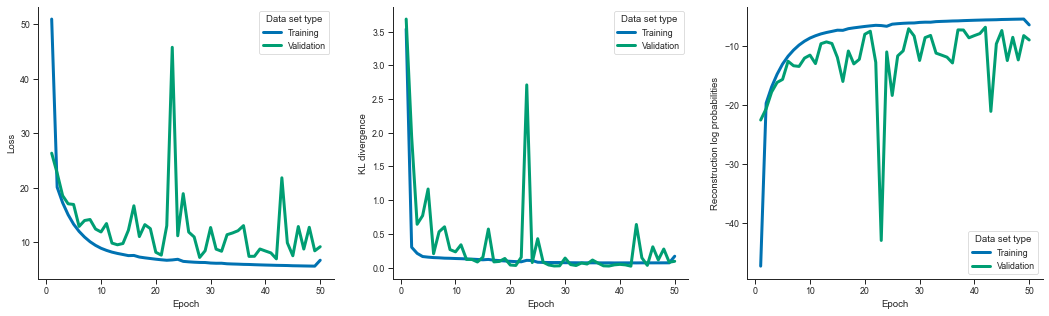

In [4]:
summary_models = SummaryModels(file_name, batch_norm=True)
df_batch_norm = summary_models.load_curves_df("Batch_Norm")
summary_models.plot_curves(df_batch_norm)

#  Batch normalization & Annealed Kullback–Leibler 

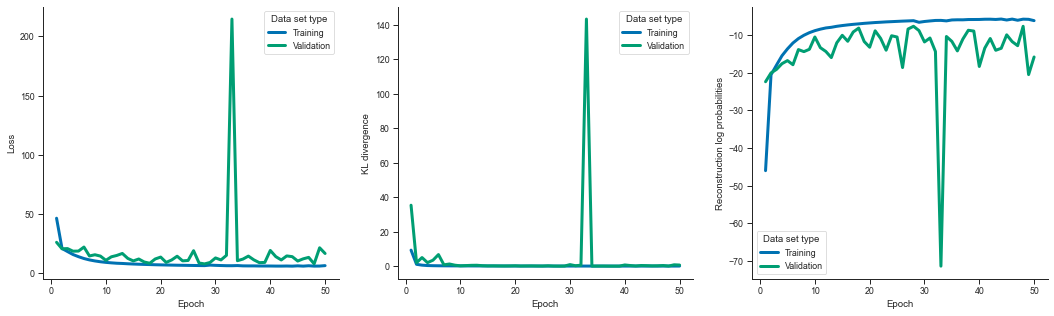

In [5]:
summary_models = SummaryModels(file_name, batch_norm=True, kl_annealing=True)
df_batch_norm_annealing = summary_models.load_curves_df("Batch_Norm_Annealing")
summary_models.plot_curves(df_batch_norm_annealing)

# Compare the different model setups

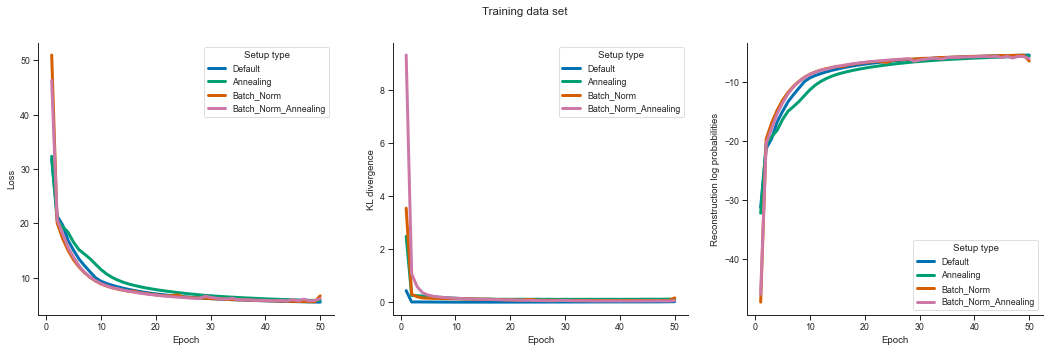

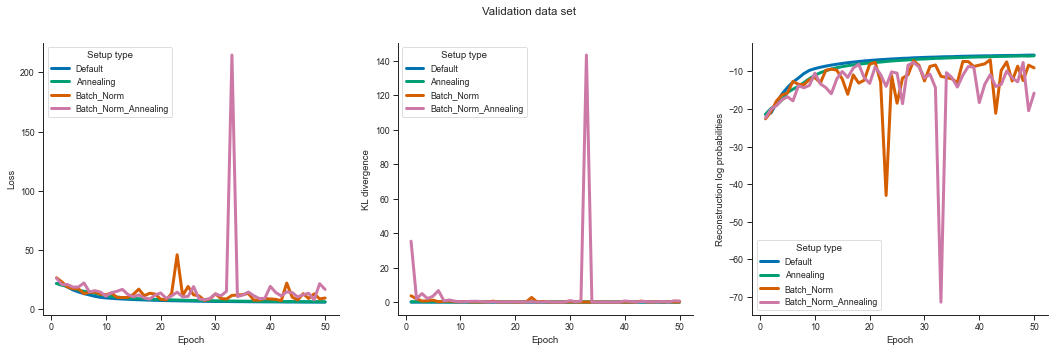

In [6]:
df = pd.concat([df_default, df_annealing, df_batch_norm, df_batch_norm_annealing])
df.reset_index(drop=True, inplace=True)
hue = "Setup type"
hue_order = ["Default", "Annealing", "Batch_Norm", "Batch_Norm_Annealing"]
summary_models.plot_curves(df[df["Data set type"] == "Training"], hue, hue_order, title="Training data set")
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order, title="Validation data set")

# Trajectory based reconstruction log probabilities
Plot histograms of the validation trajectory based reconstruction log probabilities (by ship type)

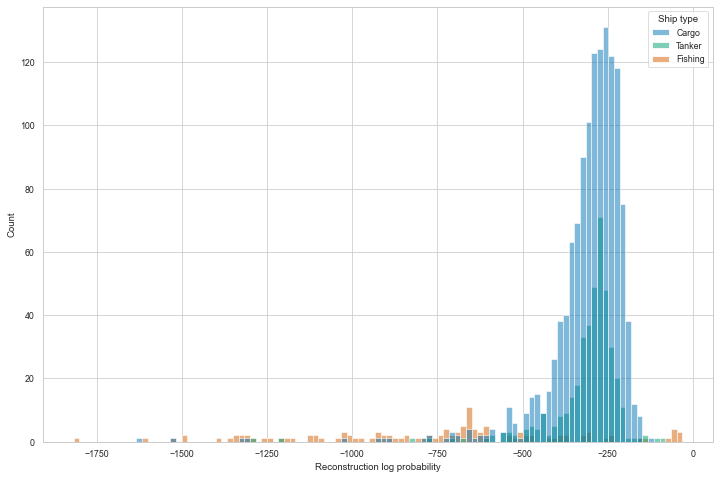

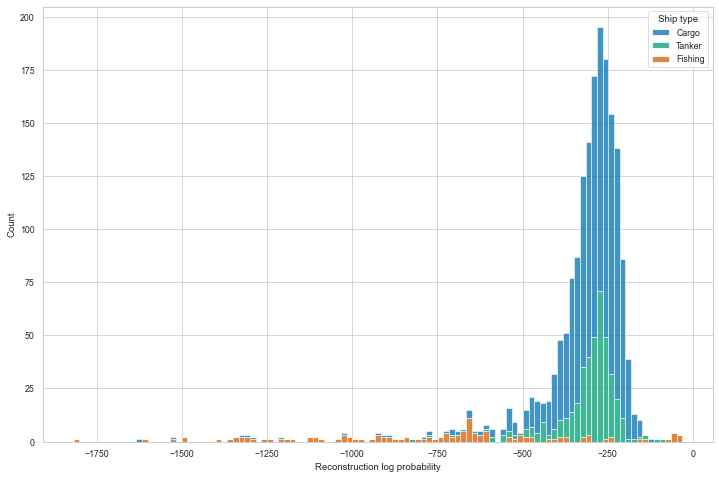

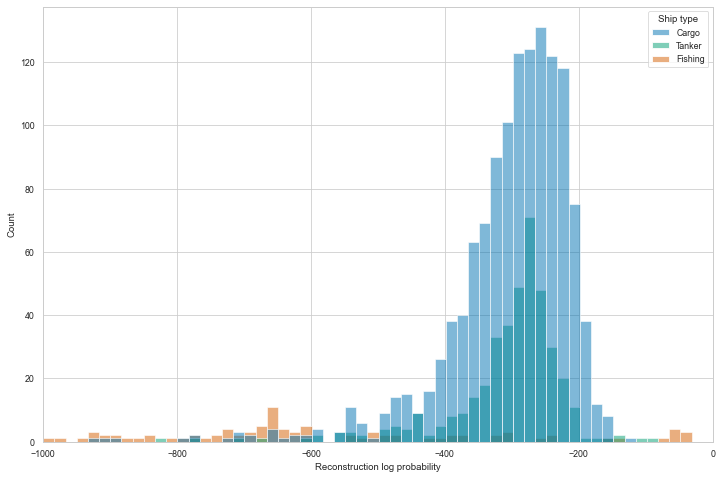

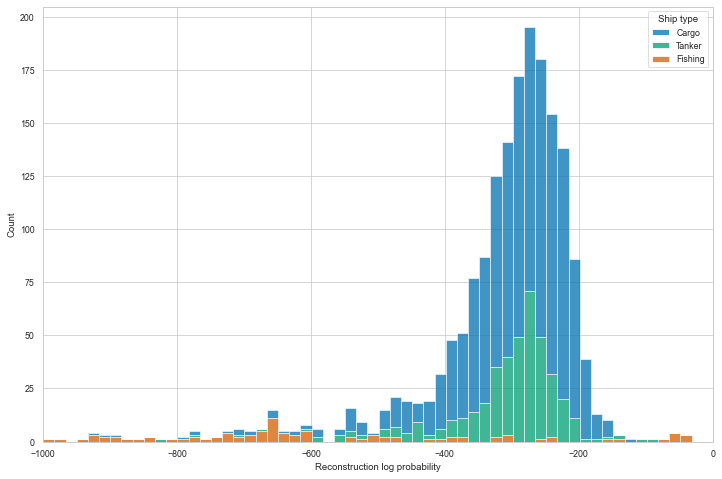

Mean Reconstruction log probability: -336.6639607467315
Median Reconstruction log probability: -288.7128448486328
{x} statistics by ship type: 
            count        mean         std          min         25%  \
Ship type                                                            
Cargo      1293.0 -305.957092  114.259225 -1632.472412 -338.494690   
Fishing     122.0 -742.406790  377.576204 -1817.923462 -990.652069   
Tanker      401.0 -312.233428  109.312064 -1287.820679 -328.697021   

                  50%         75%         max  
Ship type                                      
Cargo     -283.832825 -241.532196 -126.489532  
Fishing   -671.685089 -517.410843  -31.470329  
Tanker    -286.744385 -258.742950  -96.904121  


In [7]:
summary_models = SummaryModels(file_name)
data = summary_models.run_evaluation()["TrajectoryLevelData"]
x = "Reconstruction log probability"
hue = "Ship type"
hue_order = ["Cargo", "Tanker", "Fishing"]

# Plot trajectory based reconstruction log probabilities
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-1000, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-1000, 0], print_summary_stats=True)

# Equally weighted (point based) reconstruction log probabilities
Divide the trajectory based reconstruction log probabilities by the corresponding trajectory length and plot the same histograms as above

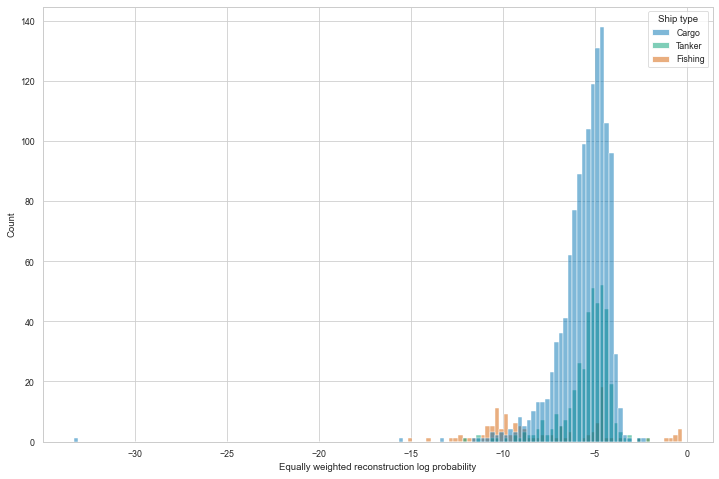

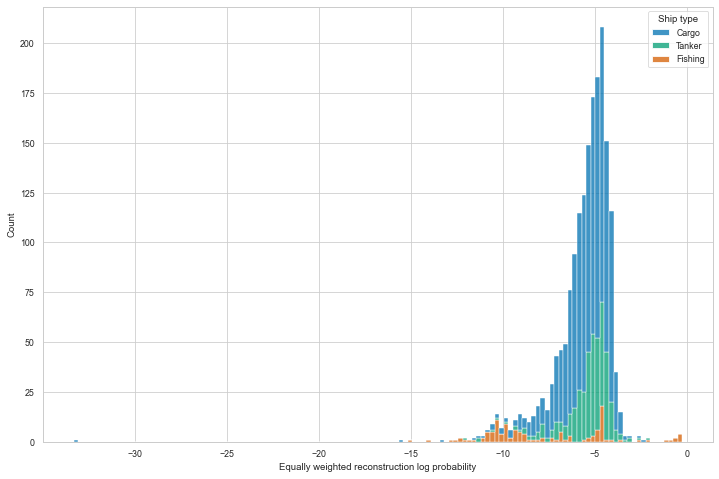

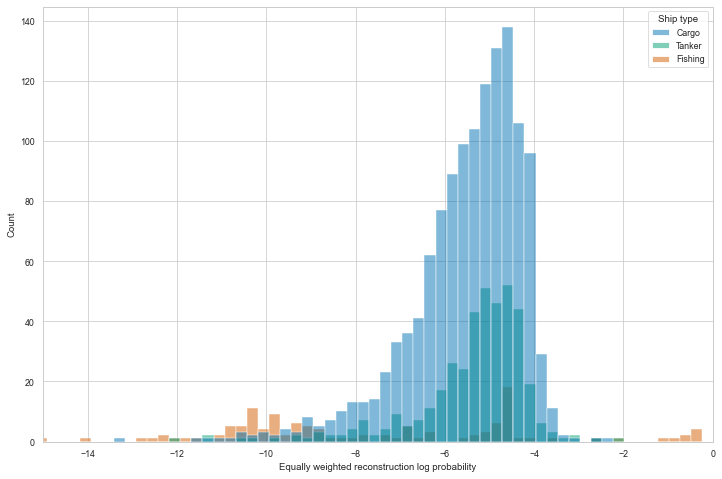

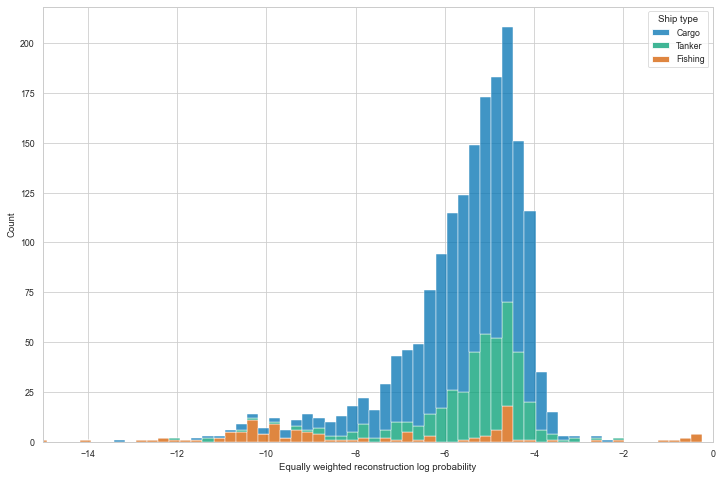

Mean Equally weighted reconstruction log probability: -5.632414135502526
Median Equally weighted reconstruction log probability: -5.222699984748324
{x} statistics by ship type: 
            count      mean       std        min        25%       50%  \
Ship type                                                               
Cargo      1293.0 -5.526826  1.507270 -33.315764  -6.076661 -5.235015   
Fishing     122.0 -7.603678  3.271408 -14.923130 -10.265763 -8.749111   
Tanker      401.0 -5.373139  1.281218 -12.103824  -5.790538 -5.067772   

                75%       max  
Ship type                      
Cargo     -4.586486 -2.383218  
Fishing   -4.717767 -0.239646  
Tanker    -4.616156 -2.155349  


In [8]:
x = "Equally weighted reconstruction log probability"
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order)
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order)

# Zoom in 
summary_models.hist_stacked_plot(data, type="Histogram", x=x, hue=hue, hue_order=hue_order, xlim=[-15, 0])
summary_models.hist_stacked_plot(data, type="Stacked", x=x, hue=hue, hue_order=hue_order, 
                                 xlim=[-15, 0], print_summary_stats=True)

In [9]:
# Look at some length statistics
data.groupby("Ship type")["Length"].describe()

,count,mean,std,min,25%,50%,75%,max
Ship type,,,,,,,,
Cargo,1293.0,56.600928,16.244934,25.0,44.0,57.0,67.0,143.0
Fishing,122.0,104.024590,38.996813,27.0,74.0,116.5,140.0,144.0
Tanker,401.0,58.219451,11.887671,25.0,52.0,57.0,62.0,143.0
